<a href="https://colab.research.google.com/github/L0ureiro/Pedidos-e-Respostas-LAI/blob/main/DeepLeanr%2BMlops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Carregar o dataset
file_path = '/content/drive/MyDrive/Disciplinas/DL e Mlops/Cópia de pedidos.parquet'  # Atualize o caminho
df = pd.read_parquet(file_path)

In [28]:
df.head()

,index,IdPedido,ProtocoloPedido,Esfera,OrgaoDestinatario,Situacao,DataRegistro,ResumoSolicitacao,DetalhamentoSolicitacao,PrazoAtendimento,FoiProrrogado,FoiReencaminhado,FormaResposta,OrigemSolicitacao,IdSolicitante,AssuntoPedido,SubAssuntoPedido,Tag,DataResposta,Resposta,Decisao,EspecificacaoDecisao
0,0,5194471,137000003202301,Federal,SGPR – Secretaria-Geral da Presidência da República,Concluída,01/01/2023,Gastos Publicos,Solicito informar o valor gasto com a festa da posse da Presidencia da Republica em 01 de janeiro de 2023.,08/02/2023,Sim,Sim,Pelo sistema (com avisos por email),Internet,0,Acesso à informação,,,19/01/2023,"Prezado(a) cidadão(ã), Em atenção ao pedido de acesso à informação cadastrado sob o NUP 00137.000003/2023-01, informamos que o gasto referente ao apoio logístico de organização e infraestrutura para a realização da cerimônia da posse presidencial do dia 01/01/2023, no que compete a esta Secretaria Especial de Administração resultou em R$ 627.930,95(seiscentos e vinte e sete mil, novecentos e trinta reais e noventa e cinco centavos). Salientamos que, de acordo com o art. 15 da Lei de Acesso à Informação (Lei nº 12.527/11) e com o art. 21 do Decreto nº 7.724/2012, há possibilidade de recurso no prazo de 10 (dez) dias, que deverá ser dirigido ao Secretário Especial de Administração da Secretaria-Geral da Presidência da República. As informações acima foram disponibilizadas pela Secretaria Especial de Administração da Secretaria-Geral da Presidência da República. Atenciosamente, Serviço de Informações ao Cidadão Palácio do Planalto - https://www.gov.br/planalto/pt-br/acesso-a-informacao/servico-de-informacao-ao-cidadao",Acesso Concedido,Resposta solicitada inserida no Fala.Br
1,1,5194479,10001000001202301,Federal,BACEN – Banco Central do Brasil,Concluída,01/01/2023,se tem saldo,gostaria de saber se tenho saldo a receber.,25/01/2023,Sim,Sim,Pelo sistema (com avisos por email),Internet,0,Acesso à informação,,,06/01/2023,"Prezado(a) senhor(a), Esclarecemos que o Banco Central (BC) não envia dados do Sistema de Valores a Receber (SVR) por esta plataforma – Fala.BR. Os dados são protegidos por sigilo, devem ser obtidos no site https://valoresareceber.bcb.gov.br/ No entanto, as consultas ao SVR estão temporariamente suspensas para aprimoramento, inclusão de novos valores. Em breve, o Banco Central divulgará: - a data de reabertura do SVR para novas consultas e resgate dos saldos existentes, - a data de reabertura do SVR e informações sobre novos tipos de valores e valores de falecidos. Se o(a) senhor(a) tiver valores a receber, não há risco de perdê-los. Eles continuarão guardados pelas instituições financeiras, esperando que o(a) senhor(a) solicite a devolução, quando as consultas ao SVR forem retomadas. O SVR foi criado com o objetivo de facilitar a comunicação entre o credor e a instituição com obrigação de devolver valores. Assim, enquanto o sistema está suspenso, uma alternativa é procurar a(s) instituição(ões) com a(s) qual(is) o(a) senhor(a) já manteve relacionamento e perguntar se há valores a receber. Cuidado com os golpes a) O único site para consulta ao SVR e para solicitação de valores é https://valoresareceber.bcb.gov.br/, b) O Banco Central não envia links nem entra em contato com o cidadão para tratar sobre valores a receber ou para confirmar seus dados pessoais, c) Ninguém está autorizado a entrar em contato com o cidadão em nome do Banco Central ou do Sistema Valores a Receber, d) Portanto, o cidadão nunca deve clicar em links suspeitos enviados por e-mail, SMS, WhatsApp ou Telegram, e) O cidadão não deve fazer qualquer tipo de pagamento/depósito prévio para ter acesso aos valores. É golpe! Apenas o(a) senhor(a) pode acessar o sistema e somente no caso de pedir o resgate sem indicar uma chave Pix, a instituição financeira que o(a) senhor(a) escolheu entrará em contato para realizar a transferência. Atenção! Mesmo nesse caso bastante específico, essa instituição não pode pedir que o(a) senhor(a) info

-- CAMPOS: PEDIDOS
------------------------------
- IdPedido - inteiro: identificador único do pedido (não mostrado no sistema);
- ProtocoloPedido - texto(17): número do protocolo do pedido;
- Esfera - texto(30): esfera do órgão destinatário do pedido;
- OrgaoDestinatario  - texto(250): nome do órgão destinatário do pedido;
- Situacao - texto(200): descrição da situação do pedido;
- DataRegistro - Data DD/MM/AAAA : data de abertura do pedido;
- ResumoSolicitacao - texto(255): resumo do pedido;
- DetalhamentoSolicitacao - texto(2048): detalhamento do pedido;
- PrazoAtendimento - Data DD/MM/AAAA : data limite para atendimento ao pedido;
- FoiProrrogado - texto(3) "Sim" ou "Não" : informa se houve prorrogação do prazo do pedido;
- FoiReencaminhado - texto(3) "Sim" ou "Não": informa se o pedido foi reencaminhado;
- FormaResposta - texto(200): tipo de resposta escolhida pelo solicitante na abertura do pedido;
- OrigemSolicitacao - texto(50): informa se o pedido foi aberto em um Balcão SIC ou pela Internet;
- IdSolicitante - inteiro: identificador único do solicitante (não mostrado no sistema);
- AssuntoPedido - texto(200) : assunto do pedido atribuído pel SIC;
- SubAssuntoPedido - texto(200) : subassunto do pedido atribuída pelo SIC;
- Tag - texto(1024): as tags são marcadores no pedido para realizar classificações que não estão em assuntos/ subassuntos;
- DataResposta - Data DD/MM/AAAA : data da resposta ao pedido (campo em branco para pedidos que ainda estejam na situação "Em Tramitação");
- Resposta - texto(8000): resposta ao pedido;
- Decisao - texto(100) : tipo resposta dada ao pedido (campo em branco para pedidos que ainda estejam na situação "Em Tramitação");
- EspecificacaoDecisao - texto(200): subtipo da resposta dada ao pedido (campo em branco para pedidos que ainda estejam na situação "Em Tramitação");

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350368 entries, 0 to 350367
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   index                    350368 non-null  int64 
 1   IdPedido                 350368 non-null  int64 
 2   ProtocoloPedido          350368 non-null  int64 
 3   Esfera                   350368 non-null  object
 4   OrgaoDestinatario        350368 non-null  object
 5   Situacao                 350368 non-null  object
 6   DataRegistro             350368 non-null  object
 7   ResumoSolicitacao        335732 non-null  object
 8   DetalhamentoSolicitacao  350368 non-null  object
 9   PrazoAtendimento         350368 non-null  object
 10  FoiProrrogado            350368 non-null  object
 11  FoiReencaminhado         350368 non-null  object
 12  FormaResposta            350368 non-null  object
 13  OrigemSolicitacao        350368 non-null  object
 14  IdSolicitante       

In [30]:
# Distribuição de valores em 'Decisao'
print(df['Decisao'].value_counts())

Decisao
Acesso Concedido                                            243106
Não se trata de solicitação de informação                    34933
Acesso Negado                                                23739
Acesso Parcialmente Concedido                                18983
Informação Inexistente                                       12880
Órgão não tem competência para responder sobre o assunto      9066
Pergunta Duplicada/Repetida                                   7661
Name: count, dtype: int64


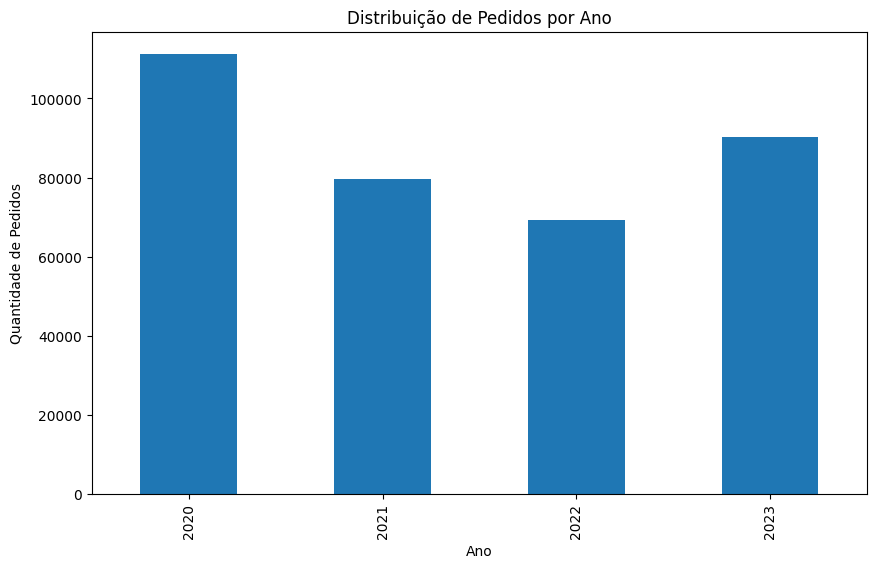

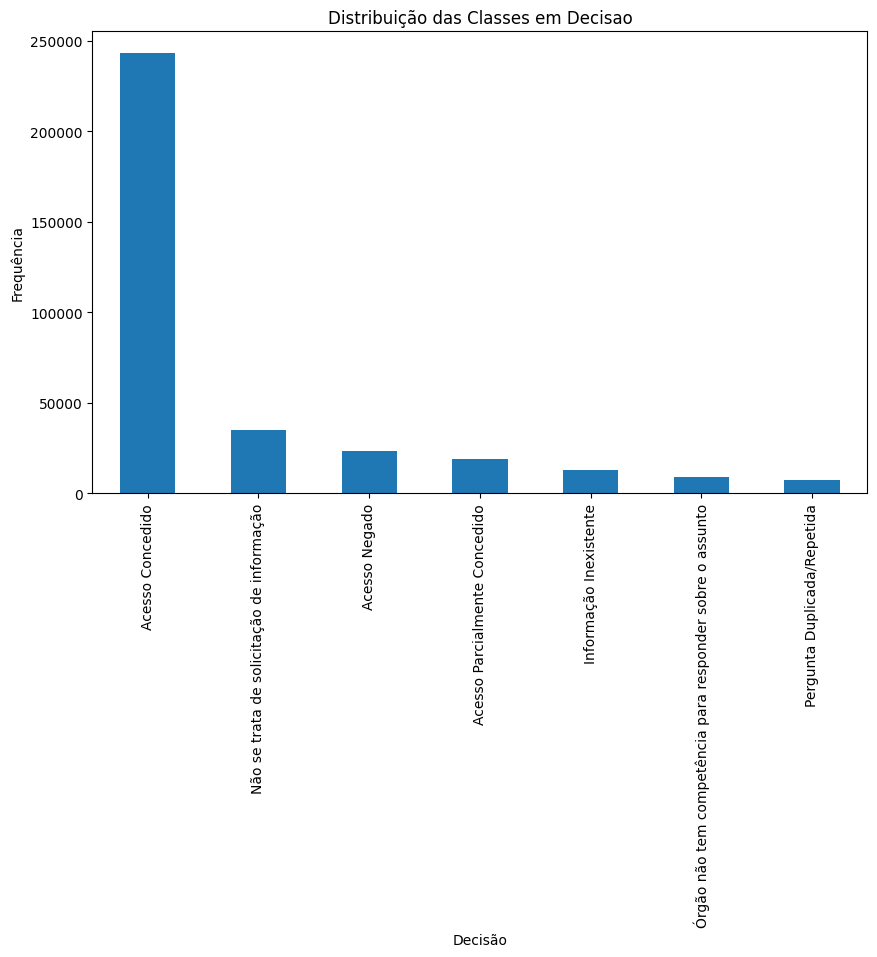

In [31]:
# Converter datas
df['DataRegistro'] = pd.to_datetime(df['DataRegistro'], format='%d/%m/%Y')

# Distribuição por ano
df['AnoRegistro'] = df['DataRegistro'].dt.year
df['AnoRegistro'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Pedidos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Pedidos')
plt.show()

# Distribuição das classes em 'Decisao'
df['Decisao'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição das Classes em Decisao')
plt.xlabel('Decisão')
plt.ylabel('Frequência')
plt.show()

In [32]:
# Remover entradas sem ResumoSolicitacao
df = df[~df['ResumoSolicitacao'].isnull()]
print(f"Quantidade de registros após remoção: {len(df)}")

Quantidade de registros após remoção: 335732


In [33]:
# Manter apenas as colunas relevantes
df_classifier = df[['ResumoSolicitacao', 'DetalhamentoSolicitacao', 'Decisao']].copy()
df_classifier.head()

,ResumoSolicitacao,DetalhamentoSolicitacao,Decisao
0,Gastos Publicos,Solicito informar o valor gasto com a festa da posse da Presidencia da Republica em 01 de janeiro de 2023.,Acesso Concedido
1,se tem saldo,gostaria de saber se tenho saldo a receber.,Acesso Concedido
2,Acesso à Água,"Prezados Em relação ao Programa Cisternas qual o local para solicitar? há algum critério para o beneficio? Existe algum edital? Na página do programa não consta muitas informações. Atenciosamente, Arliane.",Acesso Concedido
3,Kjj,O que que funciona dentro do palacio do planalto,Acesso Concedido
4,Programa Nacional das Escolas Cívico-Militares,"Gostaria de solicitar, sobre o Programa Nacional das Escolas Cívico-Militares, às seguintes informações: a) número atualizado de escolas que aderiram ao programa e que estão na espera de militarização, b) nome, cidade e unidade federativa das escolas que aderiram ao programa, c) número de militares designados para trabalhar nas escolas, funções ou cargos que exercem, d) valores (salário ou bonificações) pagos aos militares designados para às escolas, e) recursos Federais repassados às escolas desde o início do programa até 31/12/2022, Grato!",Acesso Concedido


In [34]:
# Concatenar as colunas textuais
df_classifier['texto_completo'] = df_classifier['ResumoSolicitacao'] + " " + df_classifier['DetalhamentoSolicitacao']

# Remover as colunas originais, se não forem mais necessárias
df_classifier = df_classifier[['texto_completo', 'Decisao']]

In [35]:
df_classifier

,texto_completo,Decisao
0,Gastos Publicos Solicito informar o valor gasto com a festa da posse da Presidencia da Republica em 01 de janeiro de 2023.,Acesso Concedido
1,se tem saldo gostaria de saber se tenho saldo a receber.,Acesso Concedido
2,"Acesso à Água Prezados Em relação ao Programa Cisternas qual o local para solicitar? há algum critério para o beneficio? Existe algum edital? Na página do programa não consta muitas informações. Atenciosamente, Arliane.",Acesso Concedido
3,Kjj O que que funciona dentro do palacio do planalto,Acesso Concedido
4,"Programa Nacional das Escolas Cívico-Militares Gostaria de solicitar, sobre o Programa Nacional das Escolas Cívico-Militares, às seguintes informações: a) número atualizado de escolas que aderiram ao programa e que estão na espera de militarização, b) nome, cidade e unidade federativa das escolas que aderiram ao programa, c) número de militares designados para trabalhar nas escolas, funções ou cargos que exercem, d) valores (salário ou bonificações) pagos aos militares designados para às escolas, e) recursos Federais repassados às escolas desde o início do programa até 31/12/2022, Grato!",Acesso Concedido
...,...,...
350362,"Produção de medicamentos Boa noite, tenho uma dúvida técnica, podem me ajudar? É verdade que a fabricação de medicamentos para animais deve ser em local separado dos medicamentos para humanos, ainda que a composição dos produtos seja a mesma (mas em quantidades diferentes). Ouvi dizer isso, mas não encontrei legislação sobre. Se possível, podem responder indicando texto legal ou normativa ou nota técnica acerca do assunto. Muito obrigado!",Não se trata de solicitação de informação
350363,"Dúvida a respeito da quantidade de bolsas. No ano de 2020 o Programa de Pós-Graduação em Comunicação da Universidade Federal do Rio Grande do Sul (PPGCOM/UFRGS) ofertou 10 bolsas capes para doutorado e oito para mestrado. O edital de 2021 traz apenas 4 bolsas para mestrado, numero bem abaixo de diminuição prevista pela realocação de bolsas pela portaria 34 de 35% para curso de índice 5. Desse modo, gostaria de checar os dados, quantas bolsas estão previstas para serem dadas ao PPGCOM da UFRGS em 2021?",Informação Inexistente
350364,Prorrogação de auxílio doenca Fiz um pedido de prorrogação de auxílio doenca mas não consigo ver no meu inss,Acesso Concedido
350365,"Óbitos Número de óbitos registrados por ano nos anos de 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019 e 2020",Acesso Concedido
